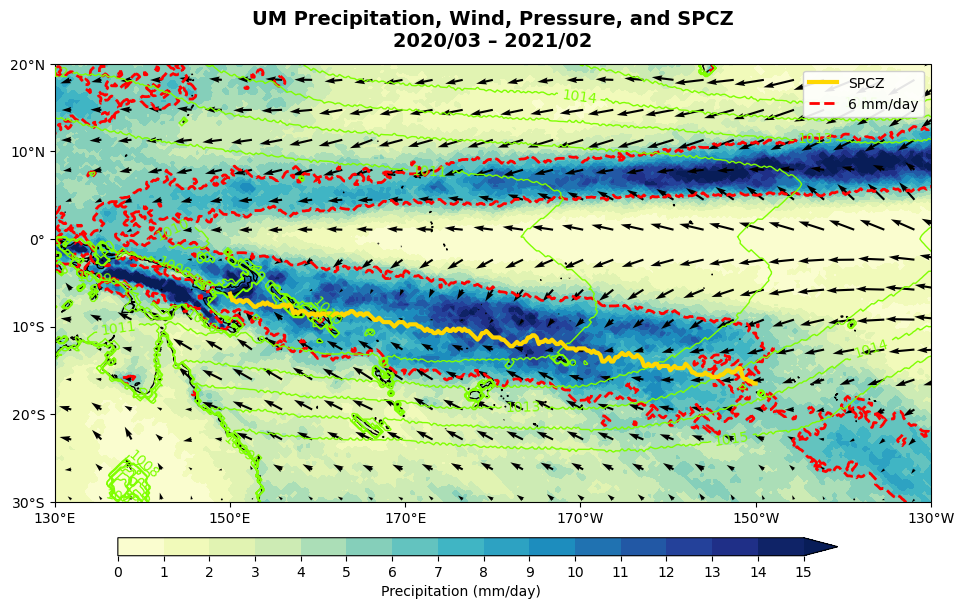

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
import pandas as pd

# File path
uk_path = '/scratch/nf33/hk25-ConvZones'
uk_file = 'UM_tot_avg_202003_202102.nc'
ds = xr.open_dataset(f"{uk_path}/{uk_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(25, -40), lon=slice(125, 235))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']
vec_step = 1

# Define Precipitation levels
levels = np.arange(0, 16, 1)

# Set up figure
fig, ax = plt.subplots(figsize=(12, 6),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Precipitation: filled contour
cf = ax.contourf(lons, lats, pr_mm_day, levels=levels, cmap='YlGnBu', extend='max',
                 transform=ccrs.PlateCarree())

# Add red contour line for 6 mm/day precipitation
ax.contour(lons, lats, pr_mm_day, levels=[6], colors='red', linewidths=2, linestyles='--',
           transform=ccrs.PlateCarree())

# Wind: quiver (subsampled)
ax.quiver(lons[::vec_step], lats[::vec_step], uas[::vec_step, ::vec_step], vas[::vec_step, ::vec_step],
          scale=200, regrid_shape=20, transform=ccrs.PlateCarree())

# Pressure: contour + labels
cs = ax.contour(lons, lats, ps, levels=range(1008, 1016, 1), colors='chartreuse', linewidths=1,
                transform=ccrs.PlateCarree())
ax.clabel(cs, inline=1, fontsize=10, fmt='%d')

# SPCZ line (gold): smoothed max precipitation latitude per longitude
spcz_lon_range = lons.sel(lon=slice(150, 210)).values
spcz_lat = []

for lon in spcz_lon_range:
    pr_lon = pr_mm_day.sel(lon=lon, method='nearest')
    pr_sub = pr_lon.sel(lat=slice(0, -40))
    pr_smooth = pr_sub.rolling(lat=51, center=True).mean()
    lat_max = pr_smooth.lat[pr_smooth.argmax(dim='lat')].values
    spcz_lat.append(lat_max)

ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=3,
        transform=ccrs.PlateCarree(), label='SPCZ')

# Map styling
ax.coastlines()
ax.set_title("UM Precipitation, Wind, Pressure, and SPCZ\n2020/03 – 2021/02", fontsize=14, fontweight='bold', y=1.02)

# Custom ticks
xticks = np.arange(130, 231, 20)
yticks = np.arange(-30, 25, 10)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='°', number_format='.0f'))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol='°', number_format='.0f'))
ax.set_extent([130, 230, -30, 20], crs=ccrs.PlateCarree())

# Create a proxy artist for the red dashed contour
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2, label='6 mm/day')
handles, labels = ax.get_legend_handles_labels()
handles.append(red_line)
labels.append('6 mm/day')
ax.legend(handles=handles, labels=labels, loc='upper right', framealpha=0.9)

# Shared colorbar
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.2, 0.06, 0.6, 0.03])
fig.colorbar(cf, cax=cbar_ax, ticks=levels, orientation='horizontal', label='Precipitation (mm/day)')

plt.show()


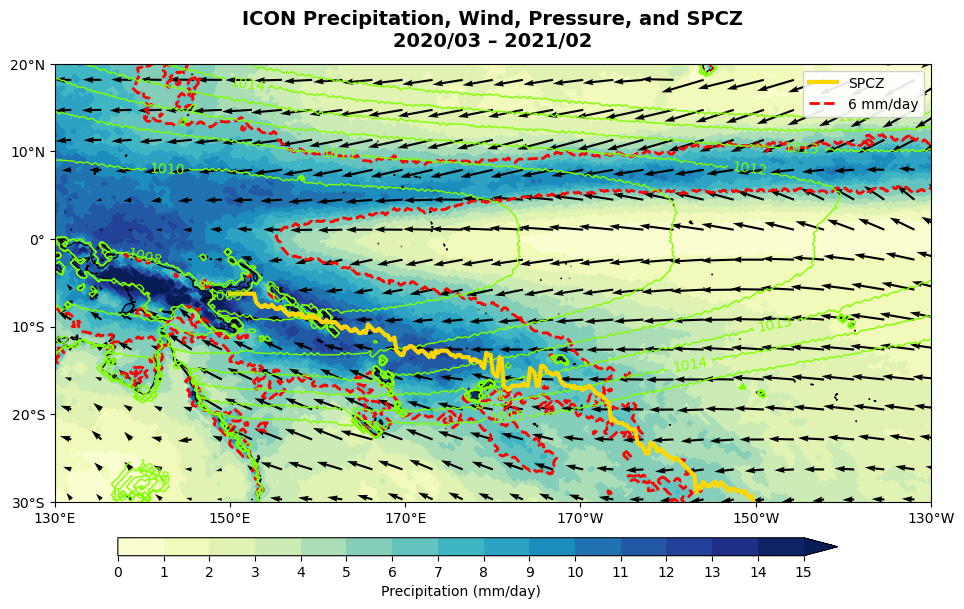

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines

# File path
ge_path = '/scratch/nf33/hk25-ConvZones'
ge_file = 'ICON_tot_avg_202003_202102.nc'
ds = xr.open_dataset(f"{ge_path}/{ge_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(25, -40), lon=slice(125, 235))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']
vec_step = 1

# Define Precipitation levels
levels = np.arange(0, 16, 1)

# Set up figure
fig, ax = plt.subplots(figsize=(12, 6),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Precipitation: filled contour
cf = ax.contourf(lons, lats, pr_mm_day, levels=levels, cmap='YlGnBu', extend='max',
                 transform=ccrs.PlateCarree())

# Add red contour line for 6 mm/day precipitation
ax.contour(lons, lats, pr_mm_day, levels=[6], colors='red', linewidths=2, linestyles='--',
           transform=ccrs.PlateCarree())

# Wind: quiver (subsampled)
ax.quiver(lons[::vec_step], lats[::vec_step], uas[::vec_step, ::vec_step], vas[::vec_step, ::vec_step],
          scale=200, regrid_shape=20, transform=ccrs.PlateCarree())

# Pressure: contour + labels
cs = ax.contour(lons, lats, ps, levels=range(1008, 1016, 1), colors='chartreuse', linewidths=1,
                transform=ccrs.PlateCarree())
ax.clabel(cs, inline=1, fontsize=10, fmt='%d')

# SPCZ line (gold): smoothed max precipitation latitude per longitude
spcz_lon_range = lons.sel(lon=slice(150, 210)).values
spcz_lat = []

for lon in spcz_lon_range:
    pr_lon = pr_mm_day.sel(lon=lon, method='nearest')
    pr_sub = pr_lon.sel(lat=slice(0, -40))
    pr_smooth = pr_sub.rolling(lat=51, center=True).mean()
    lat_max = pr_smooth.lat[pr_smooth.argmax(dim='lat')].values
    spcz_lat.append(lat_max)

ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=3,
        transform=ccrs.PlateCarree(), label='SPCZ')

# Map styling
ax.coastlines()
ax.set_title("ICON Precipitation, Wind, Pressure, and SPCZ\n2020/03 – 2021/02", fontsize=14, fontweight='bold', y=1.02)

# Custom ticks
xticks = np.arange(130, 231, 20)
yticks = np.arange(-30, 25, 10)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='°', number_format='.0f'))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol='°', number_format='.0f'))
ax.set_extent([130, 230, -30, 20], crs=ccrs.PlateCarree())

# Create a proxy artist for the red dashed contour
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2, label='6 mm/day')
handles, labels = ax.get_legend_handles_labels()
handles.append(red_line)
labels.append('6 mm/day')
ax.legend(handles=handles, labels=labels, loc='upper right', framealpha=0.9)

# Shared colorbar
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.2, 0.06, 0.6, 0.03])
fig.colorbar(cf, cax=cbar_ax, ticks=levels, orientation='horizontal', label='Precipitation (mm/day)')

plt.show()
